## Netflix Analysis Project

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [33]:
sb.set(style="whitegrid")
%matplotlib inline

In [34]:
#dataset
df = pd.read_csv("netflix_titles.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


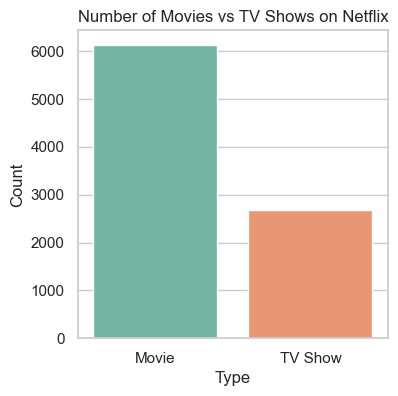

In [35]:
# Number of Movies vs TV Shows on Netflix
plt.figure(figsize=(4, 4))
sb.countplot(data=df, x='type',hue='type', palette='Set2', legend=False)
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

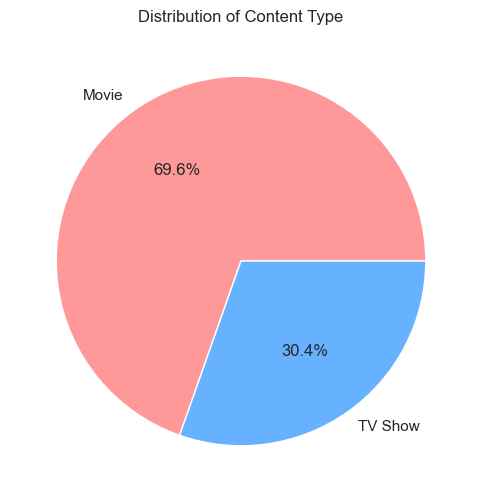

In [44]:
# Content Type Distribution (Movies vs TV Shows) in Pie Chart
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999','#66B2FF'])
plt.title("Distribution of Content Type")
plt.ylabel("")
plt.show()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


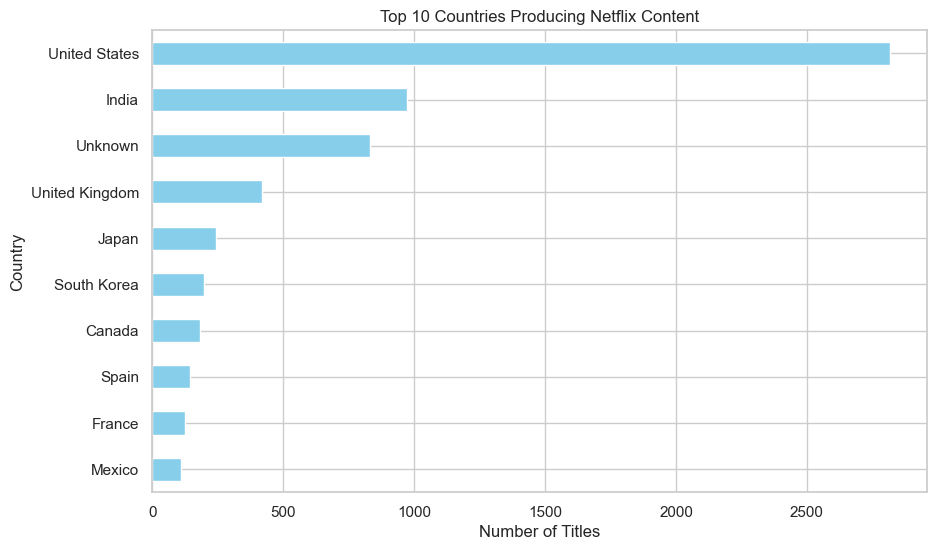

In [45]:
# Top 10 Countries Producing Netflix Content
df = pd.read_csv('netflix_titles.csv')
print(df.columns)

# Top 10 Countries
df['country'] = df['country'].fillna('Unknown')
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

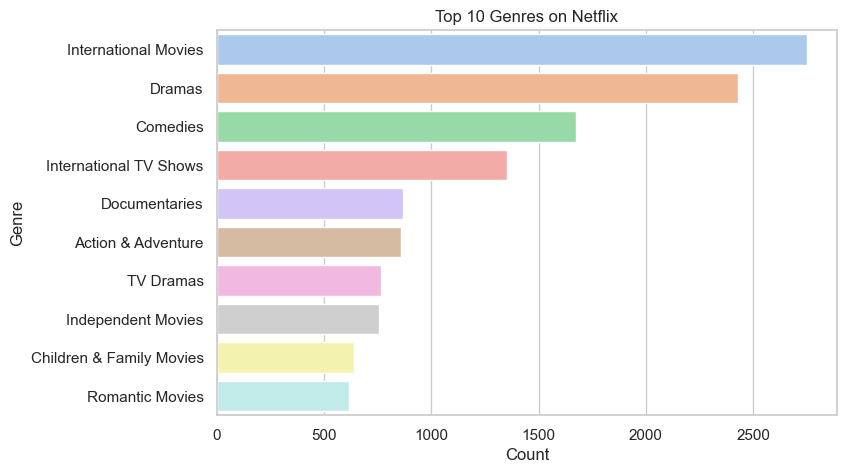

In [38]:
# Top 10 Genres on Netflix
genre_split = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genre_split for genre in sublist]
genres_series = pd.Series(all_genres)
top_genres = genres_series.value_counts().head(10)

plt.figure(figsize=(8, 5))
sb.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='pastel', legend=False)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

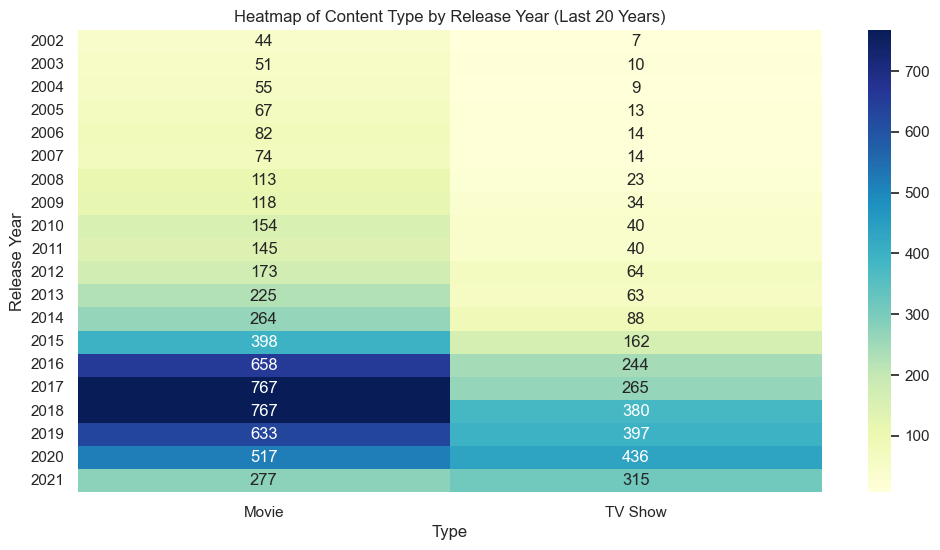

In [40]:
# "Heatmap of Content Type by Release Year (Last 20 Years)
df['release_year'] = df['release_year'].fillna(0).astype(int)
pivot_data = df.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 6))
sb.heatmap(pivot_data.tail(20), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Content Type by Release Year (Last 20 Years)")
plt.xlabel("Type")
plt.ylabel("Release Year")
plt.show()

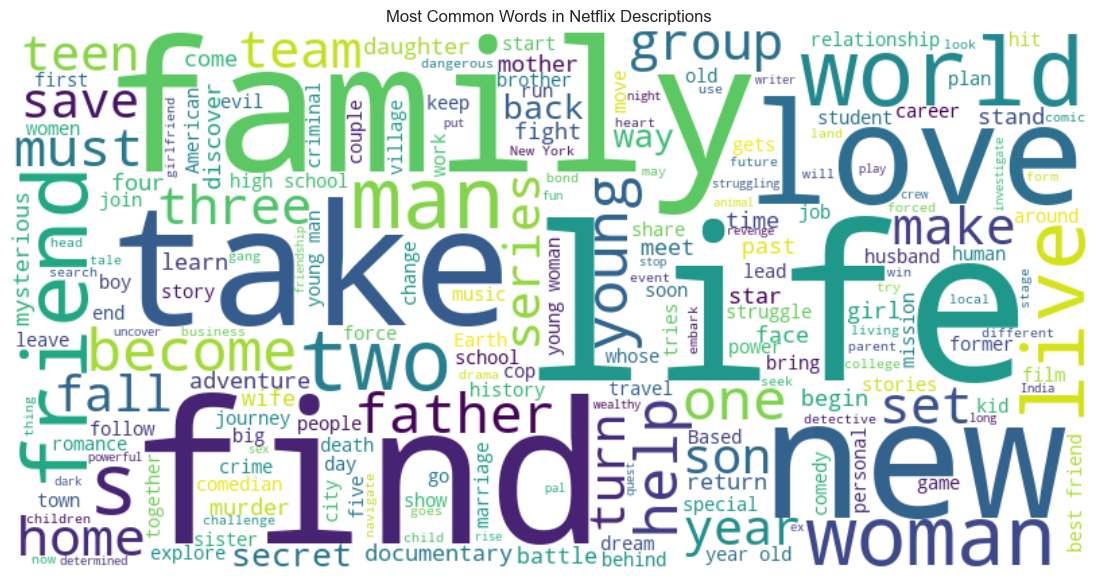

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions
text = ' '.join(df['description'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Descriptions")
plt.show()


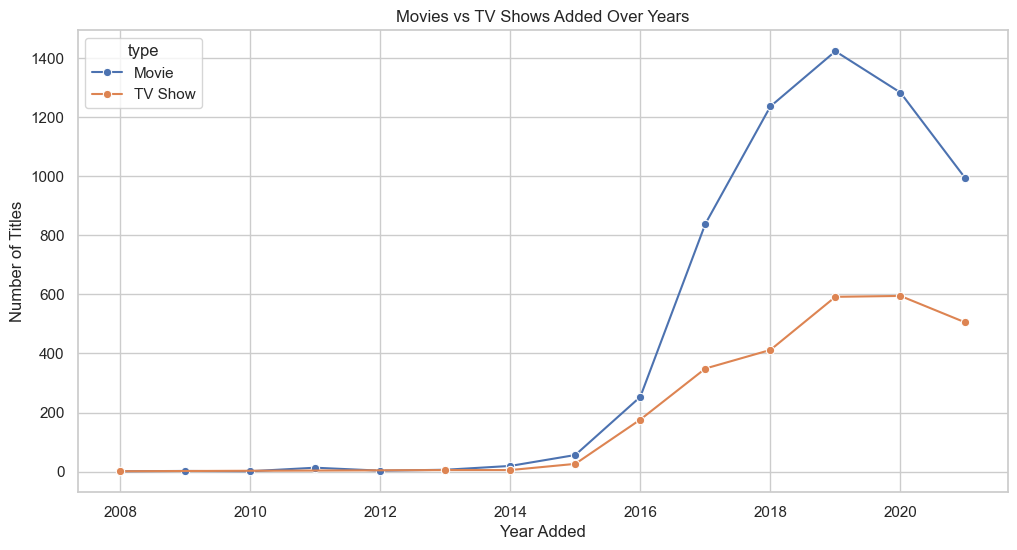

In [42]:
import seaborn as sb

# Year & Type trend
df['year_added'] = df['date_added'].dt.year

type_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sb.lineplot(data=type_year, x='year_added', y='count', hue='type', marker='o')
plt.title("Movies vs TV Shows Added Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()
